In [6]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import os
import sunpy.map
import aiapy
from aiapy.calibrate.prep import register as aiaprep  # sunpy.instr.aia.aiaprep was moved to aiapy
from sunpy.net import Fido, attrs as a
from astropy import units as u
import datetime
import glob

from aiapy.calibrate import update_pointing
import aiapy.calibrate
from sunpy.physics.differential_rotation import solar_rotate_coordinate
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.rcParams.update({'figure.autolayout': True})
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MaxNLocator


folder = '/Users/delbe/OneDrive - FHNW/aia_304/20131023_142944_3823251483'
files = glob.glob(folder + '/*')


x1, y1, x2, y2 = 1956, 2070, 1957, 1873  

gradient = (y2-y1)/(x2-x1)
origin = y1 - gradient * x1


y = np.arange(min(y1, y2),max(y1, y2)+1)
x = (y - origin) / gradient

coords = (np.column_stack((x.round().astype(int),y.astype(int))))


final_image = []
list_dates = []
list_of_skycoords_i = []
list_of_pxcoords_i = []
list_of_coords_i = []



aia0_map = sunpy.map.Map(files[0])
aiaN_map = sunpy.map.Map(files[-1])

aia0_date = aia0_map.date
aiaN_date = aiaN_map.date

pt = aiapy.calibrate.util.get_pointing_table(aia0_date - 12*u.h, aiaN_date + 12*u.h)                           
# aia_1 = sunpy.map.Map(files[0])

skycoords = aia0_map.pixel_to_world(coords[:,0] * u.pix, coords[:,1] * u.pix)

delta_time = []
# for i in range(0,len(files)-1):
for i in range(0,200):

    if i%10 == 0:
        print(i, end=',')

    try:         
        aia_map = sunpy.map.Map(files[i])

    except: 
        continue


    aia_updated_pointing = aiapy.calibrate.update_pointing(aia_map, pointing_table=pt) # instead of aia_i => aia_map

    aia_i = aiaprep(aia_updated_pointing)
    
    # skycoords_i = solar_rotate_coordinate(skycoords, time=(aia_map.date - aia0_map.date).to(u.s))
    # delta = (aia_map.date - aia0_map.date).to(u.s)

    pxcoords_i = aia_i.world_to_pixel(skycoords)

    coords_i = [pxcoords_i.y.value, pxcoords_i.x.value]


    spilltet_date = aia_i.date.isot.split("T")
    list_dates.append(spilltet_date[1])

    zi = np.flipud(aia_i.data**0.4) #[tuple(coords_i)]

    if len(final_image) == 0: 
        final_image = zi 
    else:
        final_image = np.vstack([final_image, zi])


fig, ax = plt.subplots(figsize=[30,10])      

plt.title(aia_i.date.isot)

# defining and sitting the number of ticks:

im = plt.imshow(final_image.transpose(),cmap = aia_i.cmap)
plt.colorbar()

plt.xlabel('Time[UT]')
plt.ylabel('Position')
plt.show()      

In [10]:
# plt.rcParams.update({'figure.autolayout': True})
# from matplotlib.backends.backend_pdf import PdfPages
# from matplotlib.ticker import MaxNLocator


# folder = '/Users/delbe/OneDrive - FHNW/aia_304/20140709_041000_3820256490'
# files = glob.glob(folder + '/*')


# aiamap = sunpy.map.Map(files[0])
# plt.figure()
# aiamap.plot(vmax= 2000)
# plt.colorbar()
# plt.show()
def floor(x,y, decimal=1):
    
    return round(y-x%y+x-y, decimal)


print(floor(7.94,2.125))

6.4


In [7]:
2.125-7.94%2.125+7.94-2.125

6.375

0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,

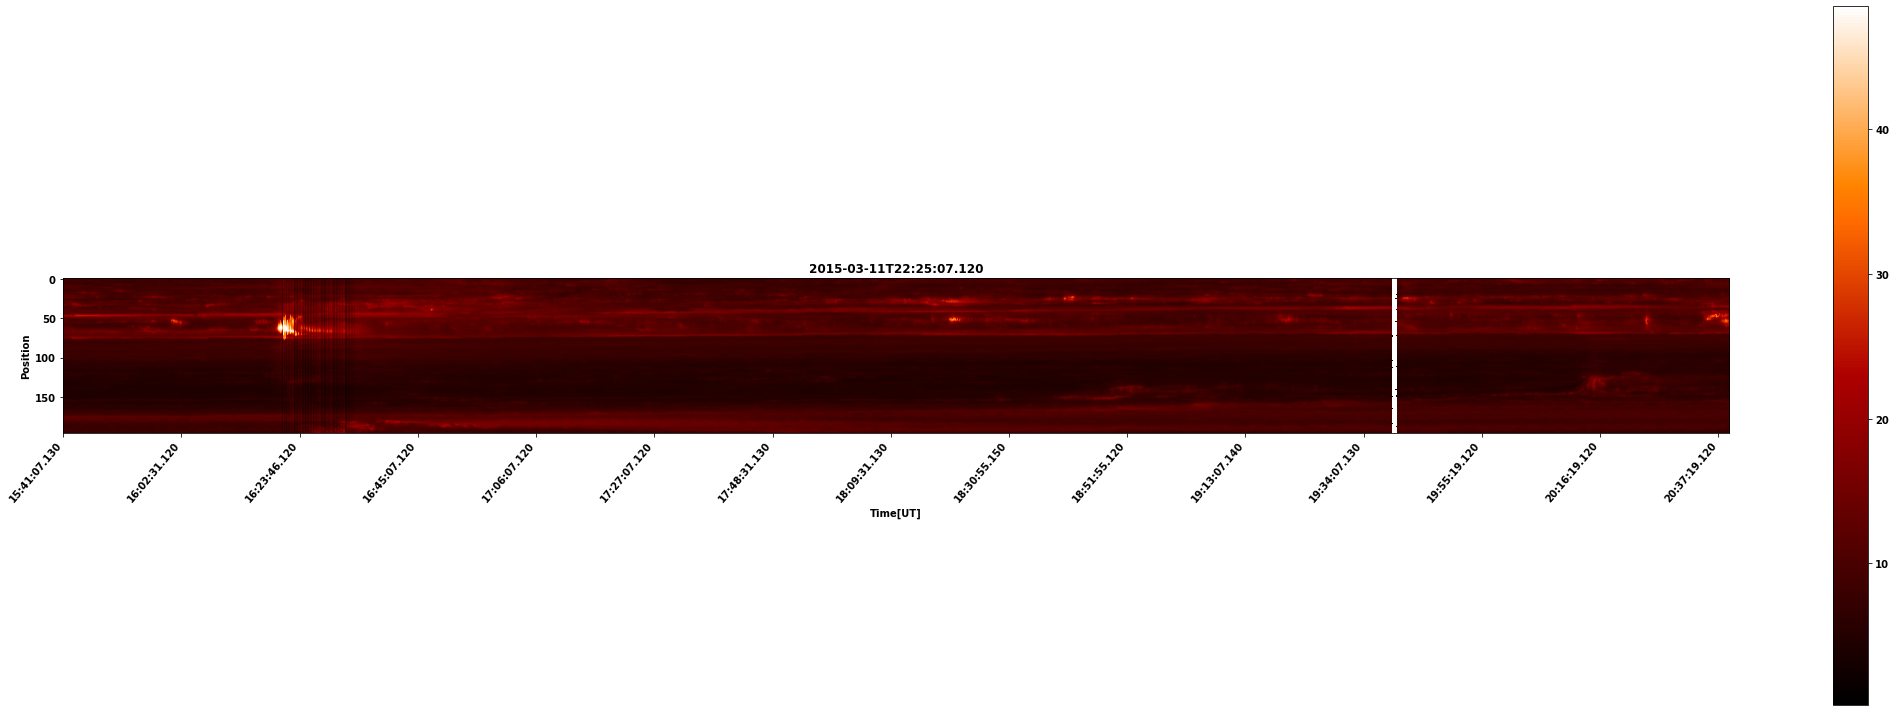

0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2

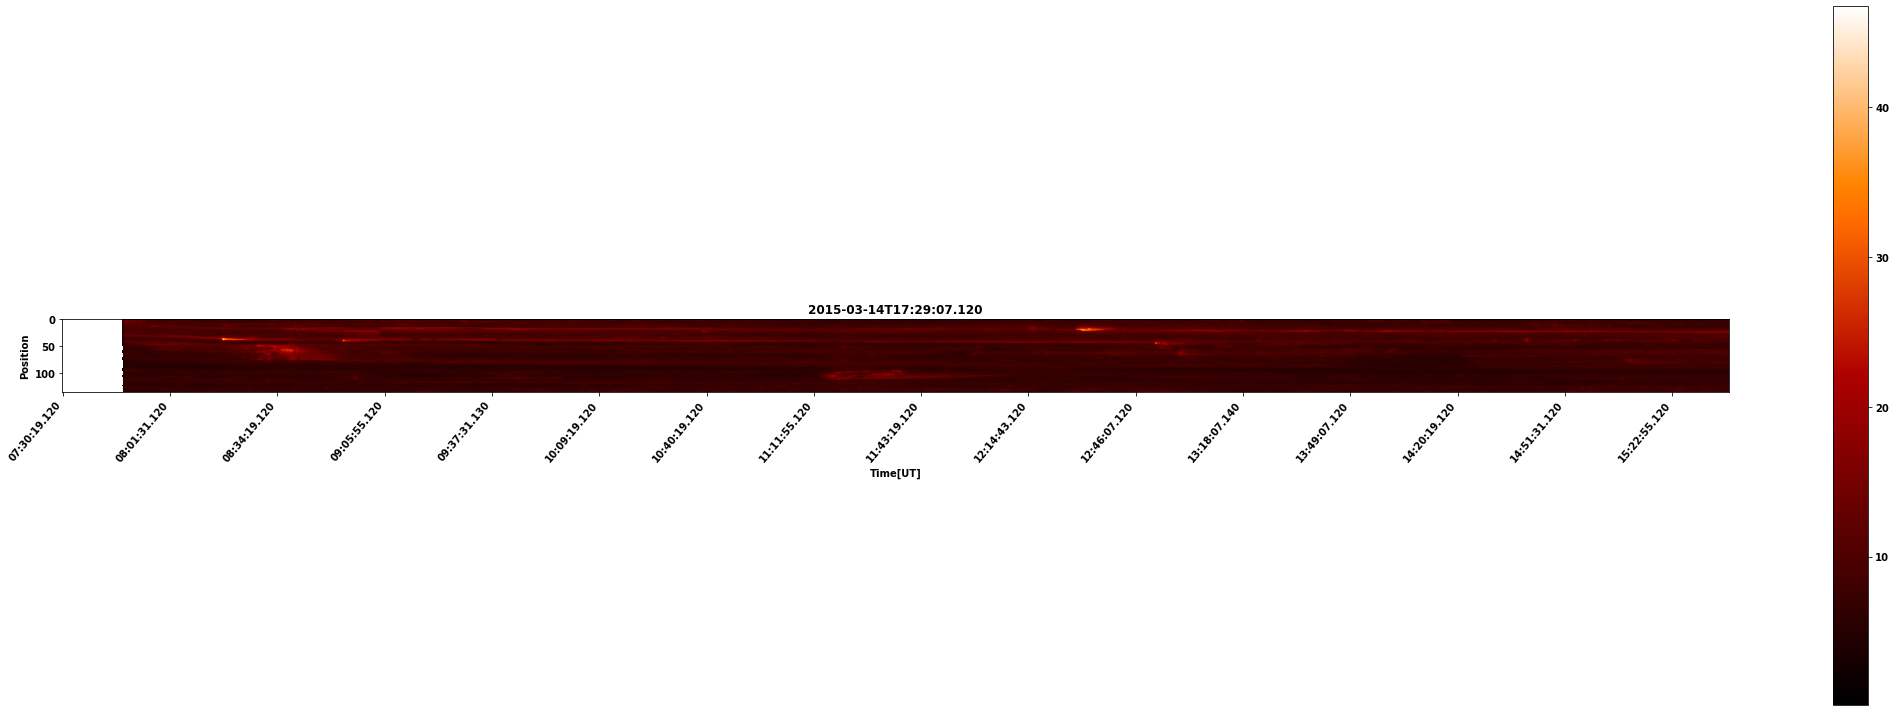

0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2

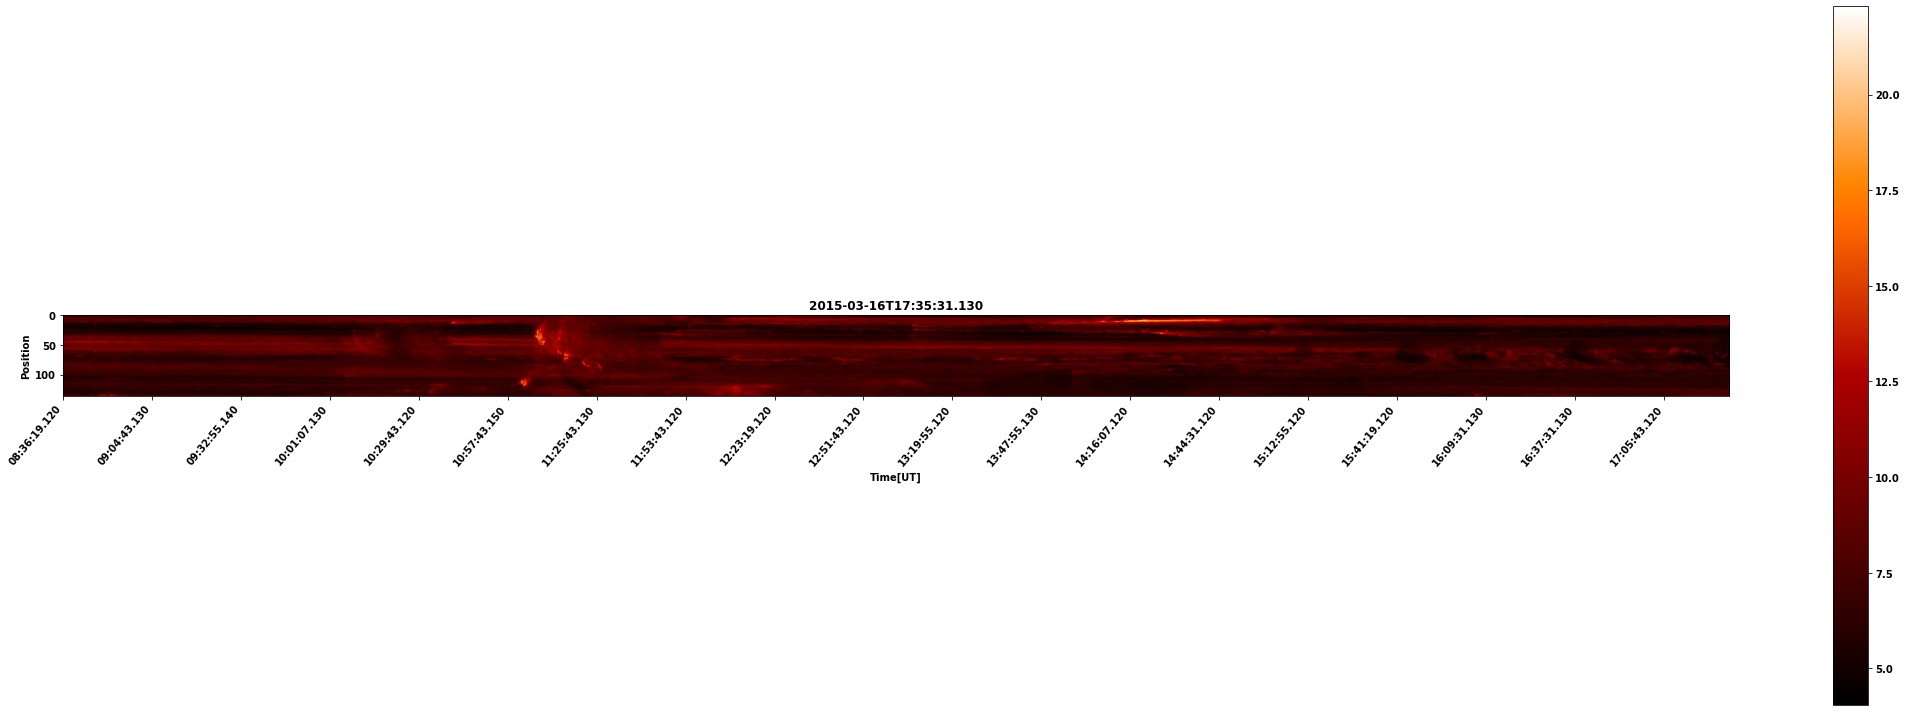

0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,

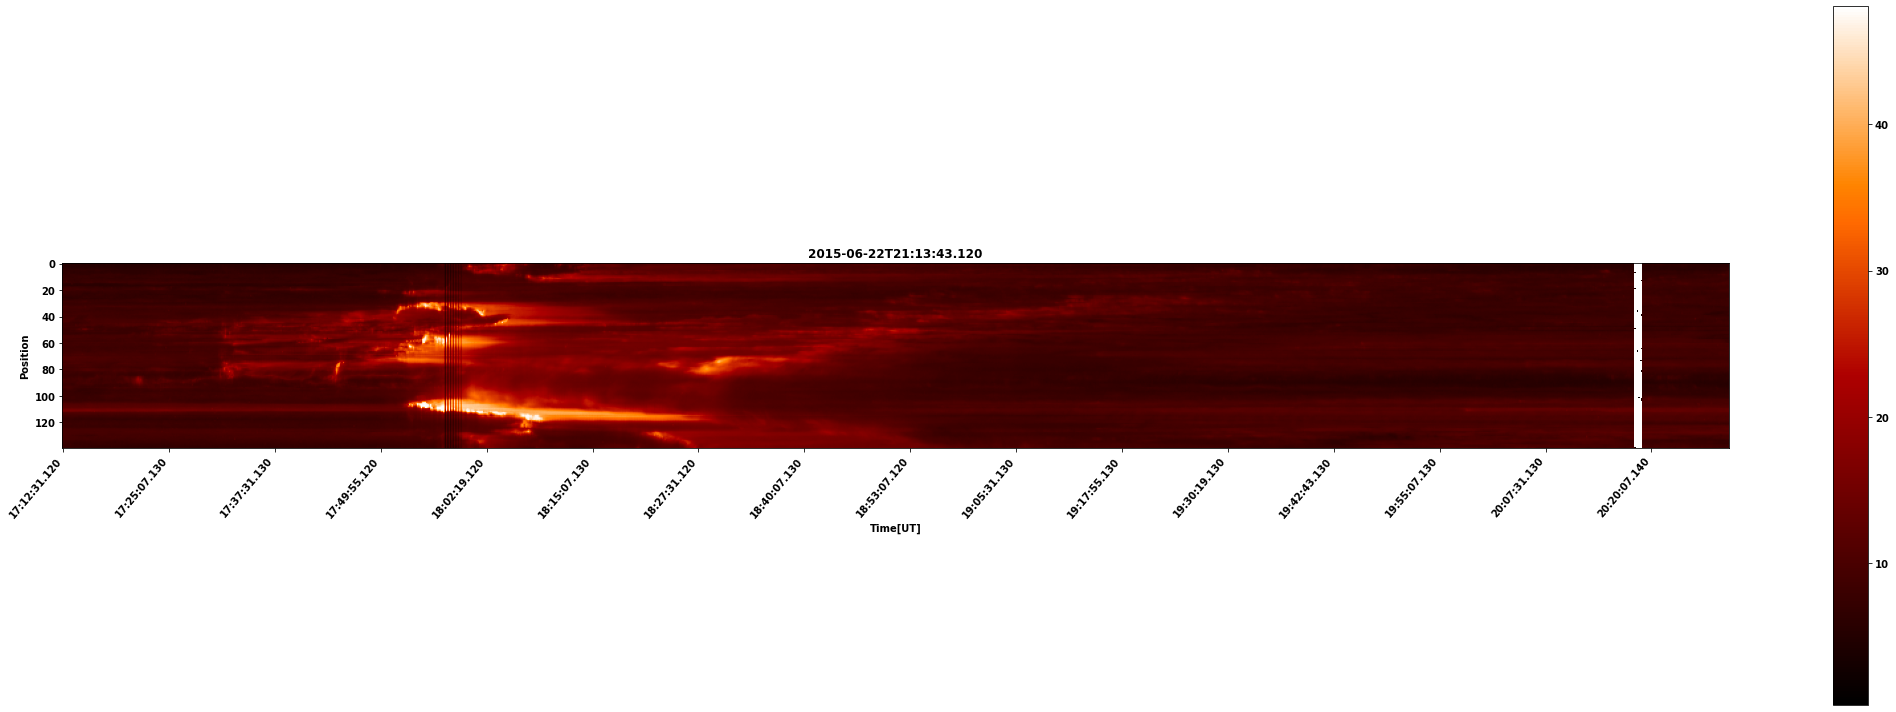

0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2

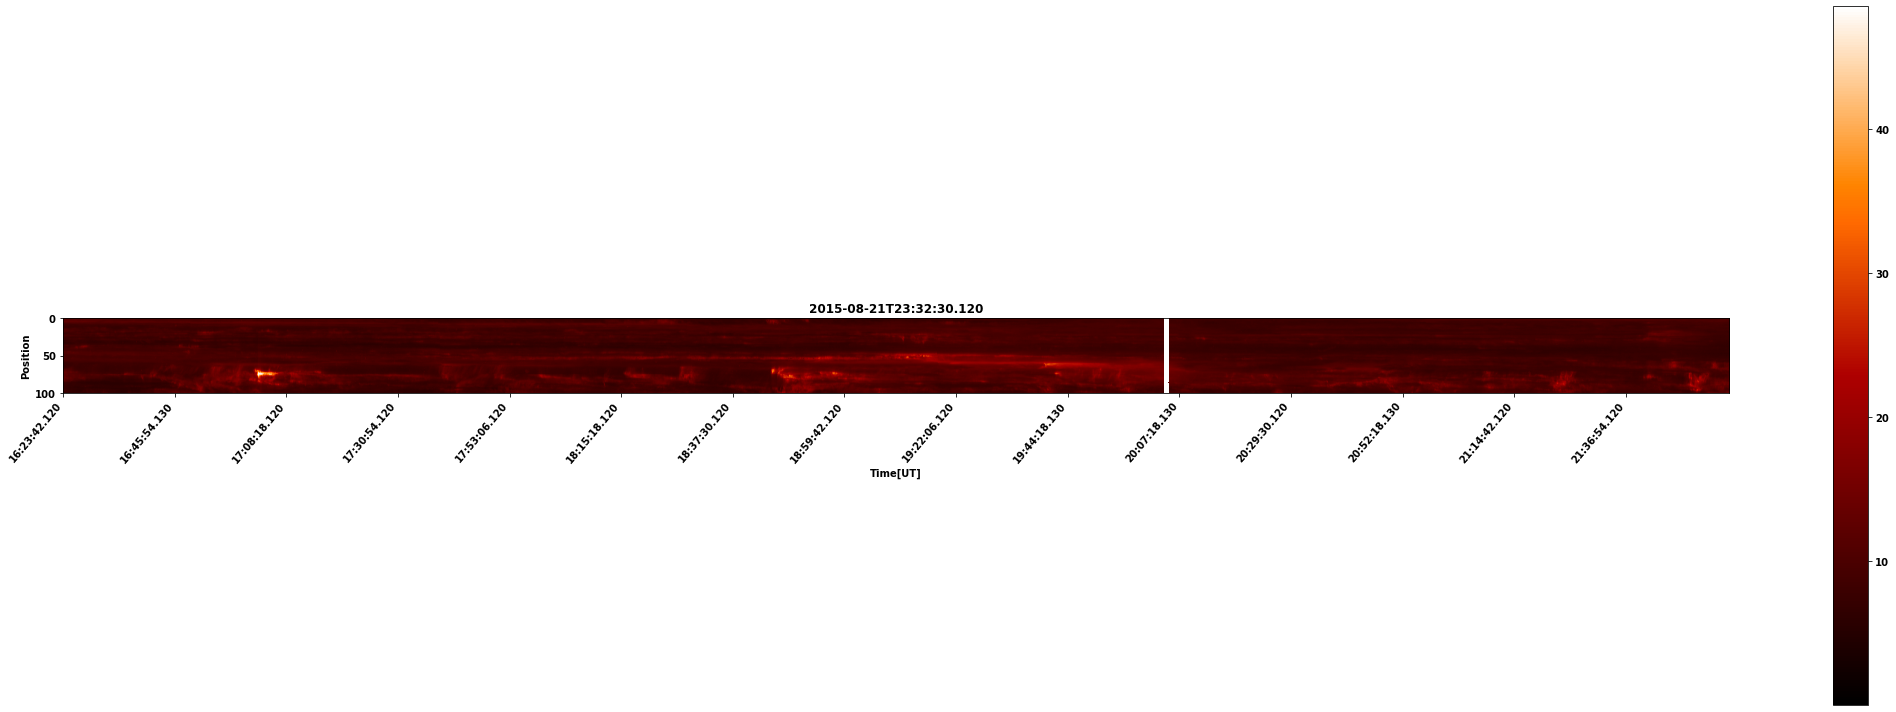

0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,

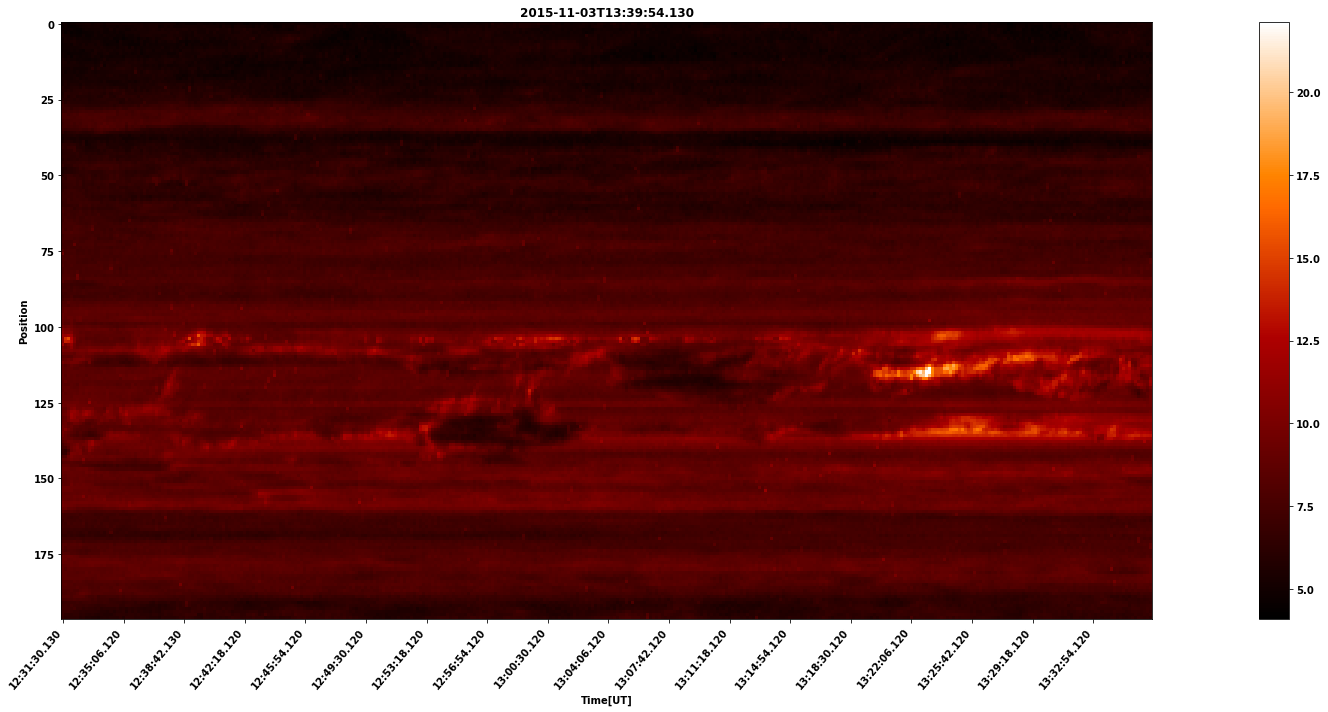

0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,

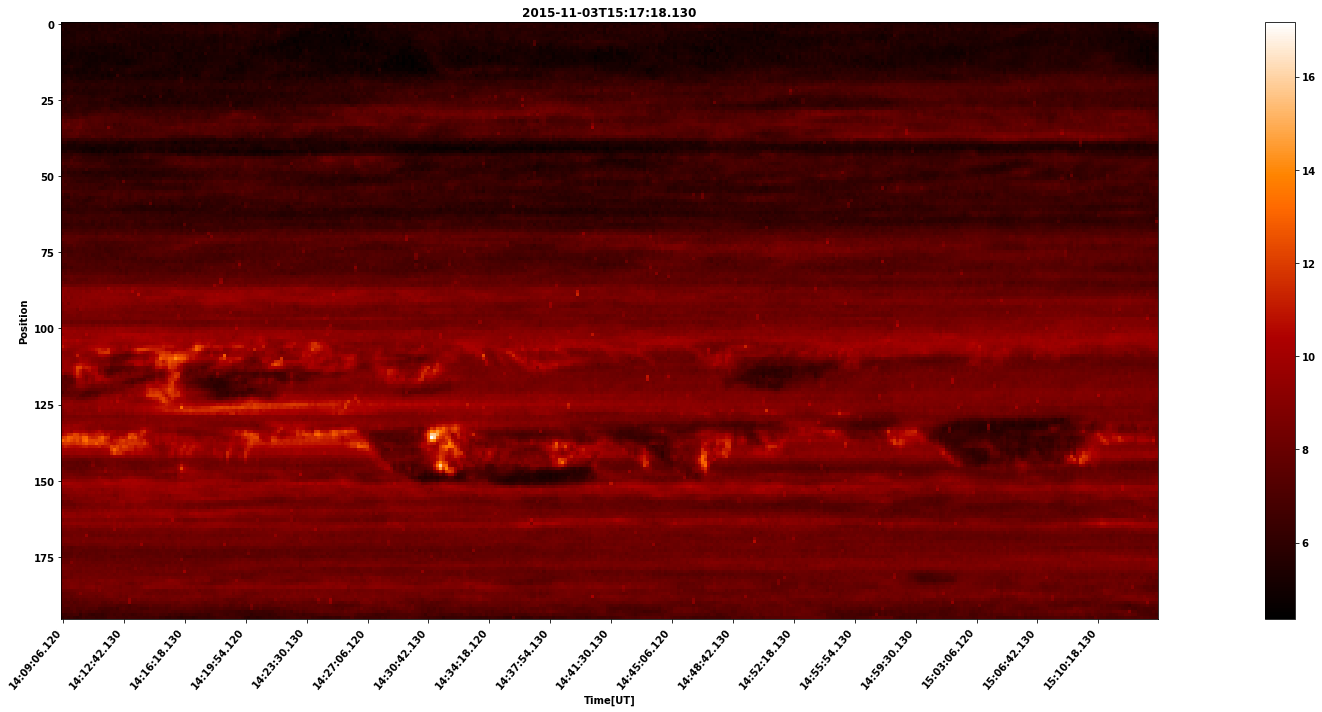

0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,

ValueError: 'nan' did not parse as unit: At col 0, nan is not a valid unit. Did you mean aN, nA, nN or na? If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html

In [8]:
plt.rcParams.update({'figure.autolayout': True})
from matplotlib.ticker import MaxNLocator
df = pd.read_excel('IRIS_AIA.xlsx' , sheet_name='test')

folder = '/Users/delbe/OneDrive - FHNW/aia_304/'
    
for label, row in df.iterrows():
    p1_x1 = row[1]
    p1_y1 = row[2]
    p2_x2 = row[3]
    p2_y2 = row[4]

    # time_axis = row[5].split("T")

    gradient = (p2_y2-p1_y1)/(p2_x2-p1_x1)
    origin = p1_y1 - gradient * p1_x1

    y = np.arange(min(p1_y1, p2_y2),max(p1_y1, p2_y2)+1)
    x = (y - origin) / gradient

    coords = (np.column_stack((x.round().astype(int),y.astype(int))))
    
    files = glob.glob(folder + row[0] + "/*")

    aia0_map = sunpy.map.Map(files[0])
    aiaN_map = sunpy.map.Map(files[-1])

    aia0_date = aia0_map.date
    aiaN_date = aiaN_map.date

    pt = aiapy.calibrate.util.get_pointing_table(aia0_date - 12*u.h, aiaN_date + 12*u.h)                           

    aia_updated_pointing_0 = aiapy.calibrate.update_pointing(aia0_map, pointing_table=pt)
    aia_0 = aiaprep(aia_updated_pointing_0)

    skycoords = aia0_map.pixel_to_world(coords[:,0] * u.pix, coords[:,1] * u.pix)


    final_image = []
    list_dates = []

    for i in range(0,len(files)-1):
    # for i in range(0,60):

        if i%10 == 0:
            print(i, end=',')

        try:         
            aia_i_map = sunpy.map.Map(files[i])

        except: 
            continue

        aia_updated_pointing_i = aiapy.calibrate.update_pointing(aia_i_map, pointing_table=pt)

        aia_i = aiaprep(aia_updated_pointing_i)

        skycoords_i = solar_rotate_coordinate(skycoords, time=(aia_i.date - aia_0.date).to(u.s))
        pxcoords_i = aia_i_map.world_to_pixel(skycoords_i) # aia_i => aia_map0

        spilltet_date = aia_i.date.isot.split("T")
        list_dates.append(spilltet_date[1]) 

        coords_x = pxcoords_i.x.value
        coords_y = pxcoords_i.y.value.round().astype('int')

        x_floor_coords = [coords_y, np.floor(coords_x).astype(int)] 
        x_ceil_coords = [coords_y, np.ceil(coords_x).astype(int)] 
        x_mod = coords_x % 1

        zi1 = np.flipud(aia_i.data**0.4)[tuple(x_floor_coords)]
        zi2 = np.flipud(aia_i.data**0.4)[tuple(x_ceil_coords)]

        zi = zi1 * (1 - x_mod) + zi2 * x_mod

        if len(final_image) == 0: 
            final_image = zi 
        else:
            final_image = np.vstack([final_image, zi])

    fig, ax = plt.subplots(figsize=[30,10])      

    plt.title(aia_i.date.isot)

    # # defining and sitting the number of ticks:
    nticks = 20 
    ax.xaxis.set_major_locator(MaxNLocator(nticks))
    ax.set_xticklabels(list_dates[::int(len(list_dates)/nticks)], rotation = 50, horizontalalignment="right")

    im = plt.imshow(final_image.transpose(),cmap = aia_i.cmap)
    plt.colorbar()

    plt.xlabel('Time[UT]')
    plt.ylabel('Position')
    
    np.save(f"../final_data/aia_times/{row[0]}_time" , list_dates)
    np.save(f"../final_data/aia_data/{row[0]}_data " , final_image)
    
    plt.show()